### Exploring distributions with summary stats

In [2]:
import pandas as pd
import scipy.stats as stats
import plotnine as p9

In [15]:
data = pd.read_csv('/Users/xingkaiwu/OneDrive - York University/MBAN Winter/MBAN 6400/Datacamp Experiment Design/undata_country_profile_variables.csv')
countrydata = data[(data['Life expectancy at birth (females/males, years)'].isna()==False) & (data['Region'].isna()==False) & (data["GDP per capita (current US$)"].isna()==False) & (data["Unemployment (% of labour force)"].isna()==False)]
countrydata=countrydata[countrydata['country']!='Holy See']
countrydata=countrydata[countrydata["Unemployment (% of labour force)"]!='...']
countrydata = countrydata.astype({"Unemployment (% of labour force)":'float'})

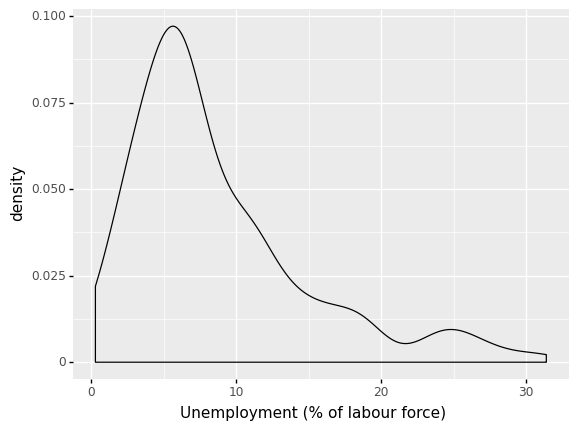


8.716315789473684
6.65
0    6.6
dtype: float64


In [18]:
# Print density plot, mean, median, and mode of Unemployment
print(p9.ggplot(countrydata)+ p9.aes(x="Unemployment (% of labour force)")+ p9.geom_density(alpha=0.5))
print(countrydata["Unemployment (% of labour force)"].mean())
print(countrydata["Unemployment (% of labour force)"].median())
print(countrydata["Unemployment (% of labour force)"].mode())

In [26]:
countrydata

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,63.3,130.0,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,3.8,4154.1,12.2,...,38.2,135.0,0.8,145.4/3.7,5900.0,55.0,84.3/81.8,89.8/82.2,0.05,NaN
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955.0,3,4714.1,6.8,...,12.4,146.0,46.5,34.8/1.4,3902.0,25.0,75.4/28.2,88.6/22.5,0.42,NaN
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343.0,2.4,14564.5,6,...,69.4,256.0,10,204.0/4.7,3167.0,85.0,99.0/100.0,96.2/98.3,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,36.3,99.0,344331.0,-6.2,11068.9,5.3,...,61.9,328.0,53.1,185.2/6.1,7460.0,90.0,95.0/77.9,97.5/69.9,0.01,NaN
223,Viet Nam,South-easternAsia,330967,95541,308.1,98.0,193241.0,6.7,2067.9,18.9,...,52.7,616.0,47.2,166.9/1.8,2977.0,30.0,99.1/96.9,94.4/69.7,1.73,NaN
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688.0,-28.1,1106.4,14.7,...,25.1,298.0,1,22.7/0.9,668.0,12.0,72.0/46.5,92.5/34.1,2.99,NaN
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255.0,2.9,1311.1,8.2,...,21,88.0,65.6,4.5/0.3,374.0,26.0,85.6/51.3,55.6/35.7,3.96,NaN


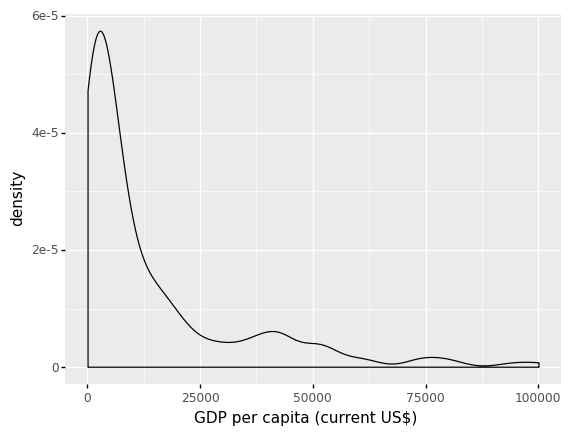


14105.381578947367
5338.65
0    1106.4
dtype: float64


In [19]:
# Print density plot, mean, median, and mode of GDP per capita
print(p9.ggplot(countrydata)+ p9.aes(x='GDP per capita (current US$)')+ p9.geom_density(alpha=0.5))
print(countrydata['GDP per capita (current US$)'].mean())
print(countrydata['GDP per capita (current US$)'].median())
print(countrydata['GDP per capita (current US$)'].mode())

### Q-Q plot

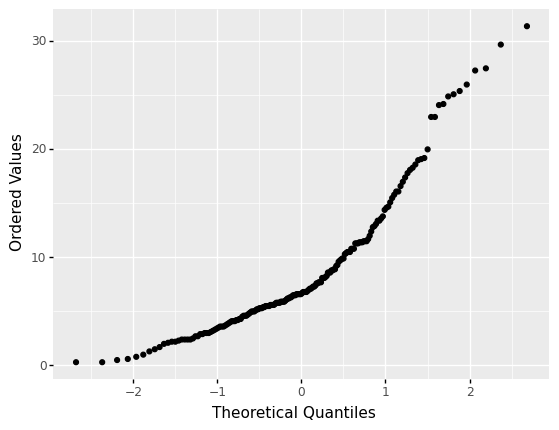

In [27]:
# Calculate theoretical quantiles
tq = stats.probplot(countrydata["Unemployment (% of labour force)"], dist='norm')

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": countrydata["Unemployment (% of labour force)"].sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles','Ordered Values') +p9.geom_point())

In [28]:
# Perform Shapiro-Wilk test on Unemployment and print result
shapiroUnem = stats.shapiro(countrydata["Unemployment (% of labour force)"])
print(shapiroUnem)

ShapiroResult(statistic=0.8688228130340576, pvalue=8.926822822608038e-12)


In [29]:
# Perform Shapiro-Wilk test on GDP per capita and print result
shapiroGDP = stats.shapiro(countrydata["GDP per capita (current US$)"])
print(shapiroGDP)

ShapiroResult(statistic=0.7096320390701294, pvalue=6.3667454819134874e-18)


Choosing tests and normality

In which of the following situations is it acceptable to use a parametric test to compare group means, like a t-test or ANOVA?

Ans: When comparing normally distributed samples or non-normally distributed samples with large sample sizes.

### Parametric vs non-parametric tests

In [10]:
data1 = pd.read_csv('/Users/xingkaiwu/OneDrive - York University/MBAN Winter/MBAN 6400/Datacamp Experiment Design/olyathswim.csv')
athletes = data1[(data1.Team.isin(['China','Norway'])) & (data1.Year==1996)]

In [14]:
# Separate the heights by country
NorwayHeights = athletes[athletes['Team'] == "Norway"].Height
ChinaHeights = athletes[athletes['Team'] == "China"].Height

# Shapiro-wilks test on the heights(p- value)
print(stats.shapiro(NorwayHeights)[1])
print(stats.shapiro(ChinaHeights)[1])

# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(NorwayHeights, ChinaHeights)
print(wilc)

0.1231110692024231
0.026477383449673653
RanksumsResult(statistic=3.8752175150628543, pvalue=0.00010652949777206396)


### Spearman correlation

In [23]:
athletesM = data1[(data1.Sport=='Athletics') & (data1.Year > 1999) & (data1.Sex == 'M') & (data1.Team == 'United States')]
athletesF = data1[(data1.Sport=='Athletics') & (data1.Year > 1999) & (data1.Sex == 'F') & (data1.Team == 'United States')]

In [26]:
# Perform Pearson and Spearman correlations for Female
pearcorr = stats.pearsonr(athletesF.Height,athletesF.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesF.Height,athletesF.Weight)
print(spearcorr)

(0.5930310490498102, 2.7070394115726576e-33)
SpearmanrResult(correlation=0.7058111482287492, pvalue=6.064659243649559e-52)


In [27]:
# Perform Pearson and Spearman correlations for Male
pearcorr = stats.pearsonr(athletesM.Height,athletesM.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesM.Height,athletesM.Weight)
print(spearcorr)

(0.5752961832067192, 7.608365617786115e-33)
SpearmanrResult(correlation=0.6643675704250841, pvalue=8.225675205162906e-47)
